## Perceptron
$$y=f(wx+b)$$

- x - input 
- y - output 
- w - вес 
- b - смещение 
- f - функция активации

Линейное выражение wx + b называют также аффинным преобразование (affine transform).

In [1]:
import torch
import torch.nn as nn
class Perceptron(nn.Module):
    """ 
    Перцептрон представляет собой один линейный слой 
    """ 
    def __init__(self, input_dim):
        """ 
        Аргументы:
        input_dim (int): размер вектора входных признаков 
        """ 
        super(Perceptron, self).__init__()
    
        self.fc1 = nn.Linear(input_dim, 1)
    
    def forward(self, x_in):
        """ 
        Прямой проход перцептрона
        Аргументы:
        x_in (torch.Tensor): тензор входных данных
        x_in.shape должен быть равен (batch, num_features) Возвращает:
        Итоговый тензор. tensor.shape должен быть равен (batch,).
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

### Sigmoid [0:1]

Она «размазывает» полученное вещественное значение по диапазону от 0 до 1. Математически сигма-функция описывается следующим образом:

$$f(x) = \frac{1}{1 + e^{-x}}$$

Как.вы.видите.из.графика,.сигма-функция.очень.быстро.насыщается.(то.есть.вы- дает. экстремальные. значения. на. выходе). для. большинства. входных. значений.. Это. может. стать. проблемой,. поскольку. градиент. становится. равен. нулю. или. расходится. до. слишком. большого. значения. с. плавающей. точкой.. Эти. феномены. известны.под.названиями.проблема «исчезающего» градиента.(vanishing.gradient. problem).и.проблема «взрывного» роста градиента.(exploding.gradient.problem).со- ответственно..В.результате.сигма-блоки.обычно.можно.увидеть.в.нейронных.сетях. только.на.выходе,.где.такое.размазывание.позволяет.интерпретировать.выходные. данные.как.вероятности

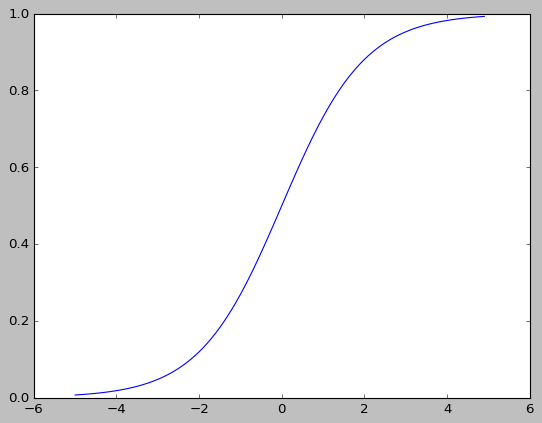

In [3]:
import torch
import matplotlib.pyplot as plt
plt.style.use('classic')
x = torch.arange(-5., 5., 0.1) #[-5,5)
y = torch.sigmoid(x) # R-style
plt.plot(x.numpy(), y.numpy()) 
plt.show()

### Гиперболический тангенс [-1:1]
можно. убедиться,. что. th. —. просто. линейное. преобразова- ние. сигма-функции
$$f(x) = th(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$

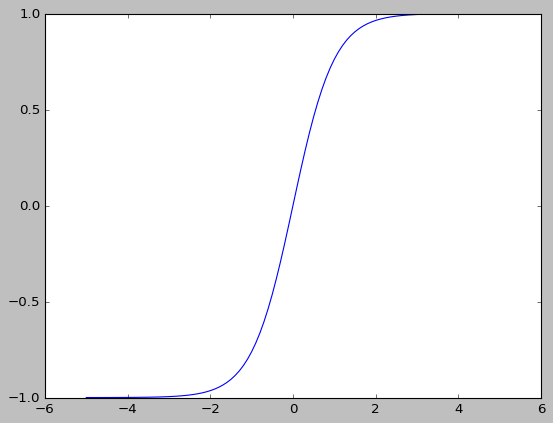

In [94]:
import torch
import matplotlib.pyplot as plt
x = torch.arange(-5., 5., 0.1) 
y = torch.tanh(x) 
plt.plot(x.numpy(), y.numpy()) 
plt.show()

### ReLU rectified.linear.unit

$$f(x) = max(0, x)$$

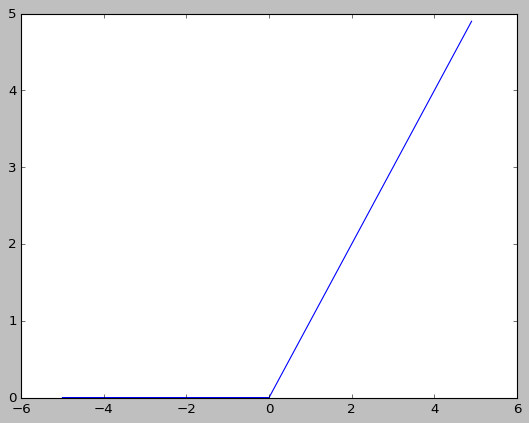

In [5]:
import torch
import matplotlib.pyplot as plt
relu = torch.nn.ReLU()
x = torch.arange(-5., 5., 0.1) 
y = relu(x)
plt.plot(x.numpy(), y.numpy()) 
plt.show()

Эффект.обрезания.ReLU,.помогающий.справиться.с.проблемой.исчезающего.гра- диента,.может.сам.стать.проблемой,.когда.с.течением.времени.некоторые.выходные.
 значения.в.сети.просто.становятся.равны.0.и.никогда.более.не.восстанавливаются.. Эта.проблема.носит.название.«умирающего.ReLU»..Для.уменьшения.этого.эффек- та.были.предложены.функции.активации.под.названием.ReLU.«с.утечкой».(leaky. ReLU).и.параметрический.ReLU.(parametric.ReLU,.PReLU),.где.коэффициент. утечки. a. —. параметр,. значение. которого. определяется. в. процессе. обучения..

$$f(x)=max(x, ax)$$


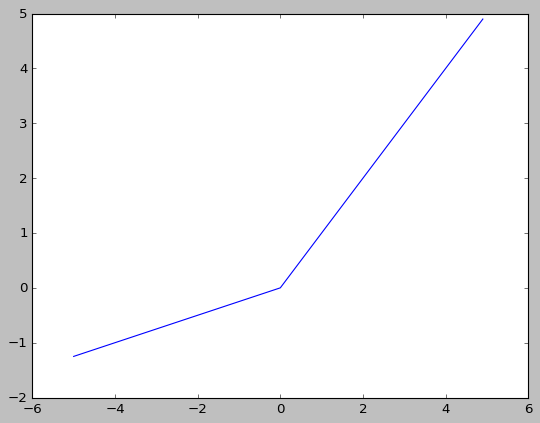

In [9]:
import torch
import matplotlib.pyplot as plt
prelu = torch.nn.PReLU(num_parameters=1)
x = torch.arange(-5., 5., 0.1) 
y = prelu(x)
plt.plot(x.detach().numpy(), y.detach().numpy()) 
plt.show()

### Многомерная логистическая функция (softmax)

Еще. один. вариант. функции. активации. —. многомерная. логистическая. функция. (softmax)..Подобно.сигма-функции,.многомерная.логистическая.функция.сжимает.результат.каждого.из.блоков.в.диапазон.от.0.до.1,.как.показано.в.примере.3.6.. Впрочем,. она. также. делит. каждый. из. результатов. на. сумму. всех. результатов,. в. итоге. получается. дискретное. распределение. вероятности1. по. k. возможным. классам:

$$softmax(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{k} e^{x_i}}$$

In [10]:
import torch.nn as nn
import torch

softmax = nn.Softmax(dim=1) 
x_input = torch.randn(1, 3) 
y_output = softmax(x_input) 
print(x_input)
print(y_output) 
print(torch.sum(y_output, dim=1))

tensor([[1.3427, 0.2521, 1.1319]])
tensor([[0.4660, 0.1566, 0.3774]])
tensor([1.])


## LOSS Functions

### MSE (RMSE, MAE)
Для. задач. регрессии,. в. которых. выходные. значения. сети. (yˆ). и. целевая. перемен- ная. (y). представляют. собой. непрерывные. значения,. в. качестве. функции. потерь. часто.применяется.среднеквадратичная.погрешность.(mean.squared.error,.MSE):

$$L_{MSE}(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}(y, \hat{y})^2$$

In [24]:
import torch 
import torch.nn as nn
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5) # , requires_grad=True 
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(2.7903)


### Функции потерь на основе дискретной перекрестной энтропии

Дискретная. перекрестная. энтропия. обычно. используется. при. постановке. задачи. многоклассовой. классификации,. при. которой. выходные. значения. интерпрети- руются.как.предсказания.вероятностей.принадлежности.определенным.классам.
Целевая. переменная. (y). представляет. собой. вектор. из. n. элементов,. соответ- ствующий.истинному.полиномиальному.распределению1.по.всем.классам..Если. правильно.определен.только.один.класс,.то.вектор.будет.унитарным..Выходные. данные. сети. (yˆ). также. представляют. собой. вектор. из. n. элементов,. но. соответ- ствующий. уже. предсказанному. сетью. полиномиальному. распределению.. Дис- кретная. перекрестная. энтропия. оценивает. потери. путем. сравнения. этих. двух. векторов.(y,.yˆ)


$$L_{перекрестная_энтропия}(y, \hat{y}) = -\sum_{i}^{}y_i log(\hat{y}_i)$$

In [42]:
torch.randn(3, 5) 

tensor([[-0.1675, -0.3692,  0.3357,  0.5462, -0.3612],
        [ 0.0684, -1.2382,  0.2727,  0.7599, -0.2549],
        [-1.0362, -0.8042,  0.5152,  0.2747,  0.4279]])

In [37]:
import torch
import torch.nn as nn

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5) 
targets = torch.tensor([1, 0, 3], dtype=torch.int64) 
loss = ce_loss(outputs, targets)
print(loss)

tensor(2.5624)


### Функция потерь на основе бинарной перекрестной энтропии

В.примере.3.9.мы.создаем.выходной.вектор.бинарных.вероятностей,.probabilities,. применяя.сигма-функцию.активации.к.случайному.вектору,.представляющему.вы- ходные.значения.сети..Далее.создается.вектор.контрольных.значений,.состоящий. из.0.и.12..Наконец,.мы.вычисляем.BCE.на.основе.вектора.бинарной.вероятности. и.вектора.контрольных.значений.


In [45]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.7807],
        [0.6839],
        [0.4178],
        [0.5589]])
tensor(0.7726)


## Supervised learning 
- X observations
- Y targets
- optimizer 
- LOSS function
- predictions 

In [48]:
# https://deeplizard.com/learn/video/rcc86nXKwkw
in_features = torch.tensor([1.,2,3,4])
fc = nn.Linear(in_features=4, out_features=3, bias=True)
print(fc(in_features))
print(fc.weight)
print(fc.bias)

tensor([-0.8992, -1.4609, -0.0525], grad_fn=<AddBackward0>)
Parameter containing:
tensor([[-0.1790, -0.3061,  0.0274, -0.0044],
        [-0.2166, -0.0602, -0.0069, -0.3047],
        [-0.3041, -0.3348,  0.1028,  0.1913]], requires_grad=True)
Parameter containing:
tensor([-0.1726,  0.1154, -0.1524], requires_grad=True)


In [49]:
import torch
import torch.nn as nn
import torch.optim as optim

class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
    def forward(self, x_in):
        return torch.sigmoid(self.fc1(x_in)).squeeze()


input_dim = 2 
lr = 0.001
perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr) ## try Adagrad, SGD

In [52]:
perceptron.zero_grad()

Шаги:
- вычисление функции потерь 
- градиент функции потерь сигнащизирует насколько нужно менять параметры 
- каждый параметре обновляется на собственный шаг
- zero_grad - очищает всю информацию 
- вычиcляется y_pred
- вычисляется функция потерь y_pred и y_target
- backward() - сообщает параметрам их градиенты 
- step() - обновляет параметры 
- данные подаются пакетами(batches)

In [ ]:
for epoch_i in range(n_epochs):
    # Проходим во внутреннем цикле по пакетам набора данных
    for batch_i in range(n_batches):
        # Шаг 0: получаем данные
        x_data, y_target = get_toy_data(batch_size)
        # Шаг 1: очищаем значения градиентов 
        perceptron.zero_grad()
        # Шаг 2: вычисляем прямой проход модели
        y_pred = perceptron(x_data, apply_sigmoid=True)
        # Шаг 3: вычисляем оптимизируемую величину потерь 
        loss = bce_loss(y_pred, y_target)
        # Шаг 4: транслируем сигнал потерь обратно по графу вычислений 
        loss.backward()
        # Шаг 5: запускаем выполнение обновления оптимизатором 
        optimizer.step()